# This is a simple project of sales analysis

### First things first we need to import all the libraries that we need

In [1]:
import pandas as pd
import os

The datafile that I got here is split by month and we need to merge it first

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

sales_all = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    sales_all = pd.concat([sales_all, current_data])
    
sales_all.to_csv("sales_all.csv", index=False)

Now we check if the data is all compiled in one file

In [3]:
sales_all.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1410,260698,Bose SoundSport Headphones,1,99.99,10/13/19 11:22,"459 Dogwood St, Los Angeles, CA 90001"
1777,195770,27in FHD Monitor,1,149.99,05/16/19 14:26,"708 7th St, New York City, NY 10001"
2305,297854,AAA Batteries (4-pack),1,2.99,12/12/19 23:34,"350 8th St, San Francisco, CA 94016"
1923,178389,USB-C Charging Cable,1,11.95,04/18/19 17:03,"403 Lakeview St, Seattle, WA 98101"
2946,239494,34in Ultrawide Monitor,1,379.99,08/28/19 17:16,"600 13th St, Boston, MA 02215"
10405,160455,Wired Headphones,1,11.99,02/24/19 00:15,"721 Hill St, Atlanta, GA 30301"
8688,184853,Vareebadd Phone,1,400,04/17/19 10:07,"509 6th St, Boston, MA 02215"
6388,229019,AA Batteries (4-pack),1,3.84,07/05/19 12:02,"438 Cherry St, San Francisco, CA 94016"
4544,227257,AA Batteries (4-pack),1,3.84,07/31/19 13:27,"126 4th St, New York City, NY 10001"
5525,300923,Bose SoundSport Headphones,1,99.99,12/12/19 16:37,"788 2nd St, New York City, NY 10001"


Notice that we have variance of month in the order date column, now lets check the info in our data

In [4]:
sales_all.info()
sales_all.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Additonal formatting & Cleaning the data

Now we drop all the NA values in the data

In [5]:
sales_all = sales_all.dropna()

In [7]:
# filtered all the unrelated values
sales_all = sales_all[sales_all['Order Date'].str[0:2]!='Or']

Order ID                                     177055
Product                    Lightning Charging Cable
Quantity Ordered                                  1
Price Each                                    14.95
Order Date                           04/09/19 12:37
Purchase Address    59 Forest St, Atlanta, GA 30301
Name: 520, dtype: object

Here we gonna format our column into lowercase

In [8]:
#set columns to lowercase
sales_all.columns = sales_all.columns.str.lower()


Now we check the categorical and numerical data and set it into the correct type

In [9]:
sales_all['quantity ordered'] = pd.to_numeric(sales_all['quantity ordered'])
sales_all['price each'] = pd.to_numeric(sales_all['price each'])

### Task 2: Fix the order date column

In [10]:
#1 The approach that I used here is to format the data into a datetime datatype

sales_all['order date'] = pd.to_datetime(sales_all['order date'],\
                        format= '%m/%d/%y %H:%M', errors='coerce')
#2 now we extract the data and added it into new column
sales_all['order day'] = pd.DatetimeIndex(sales_all['order date']).day
sales_all['order month'] = pd.DatetimeIndex(sales_all['order date']).month
sales_all['order year'] = pd.DatetimeIndex(sales_all['order date']).year


#### Question no 1: What was the best month for sales? How much was earned in that month

First I'm gonna add new column which is sales from quantity ordered*price each

In [26]:
sales_all['sales'] = sales_all['quantity ordered'].astype('int') * sales_all['price each'].astype('float')
sales_all['sales'] = sales_all['sales'].astype('int')

In [27]:
result1 = sales_all.groupby(['order month']).sum()
result1

,quantity ordered,price each,order day,order year,sales
order month,,,,,
1,10903,1811768.38,155814,19602505,1815143
2,13449,2188884.72,174408,24177525,2193165
3,17005,2791207.83,241774,30593907,2795907
4,20558,3367671.02,282960,36905301,3377215
5,18667,3135125.13,264875,33446754,3140375
6,15253,2562025.61,209880,27365526,2567871
7,16072,2632539.56,227910,28857567,2637209
8,13448,2230345.42,192315,24149259,2235667
9,13109,2084992.09,180101,23462799,2088915


Now let's see how it looks like if we plot it into matplotlib

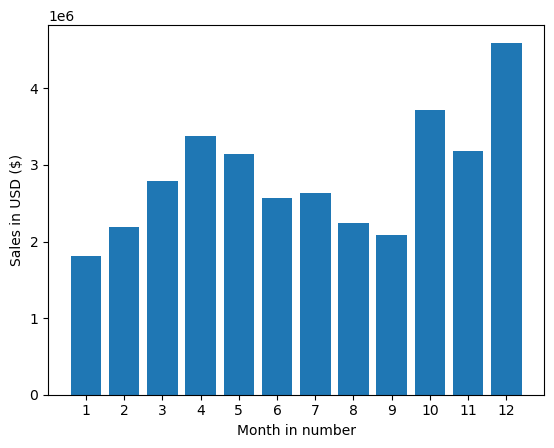

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

months = range(1,13)
plt.bar(months, result1['sales'])
plt.xticks(months)
plt.xlabel('Month in number')
plt.ylabel('Sales in USD ($)');




### Question 2: What City has the highest number of sales

For this question we need to extract information from the address column

In [75]:
#This is my approach to extract the string information from the column
city = sales_all['purchase address'].str.split(pat=',',expand=True)[1].str.strip()
state = sales_all['purchase address'].str.split(pat=',',expand=True)[2].str.strip()
state = state.str[:2]
#concatenate the value
sales_all['city'] = city+' '+'('+state+')'


,order id,product,quantity ordered,price each,order date,purchase address,order day,order month,order year,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,11,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17,9,2019,8,Los Angeles (CA)
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1,9,2019,700,San Francisco (CA)
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23,9,2019,700,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",19,9,2019,379,San Francisco (CA)


In [77]:
result2 = sales_all.groupby('city').sum()
result2

,quantity ordered,price each,order day,order month,order year,sales
city,,,,,,
Atlanta (GA),16602,2779908.20,234837,104794,30044739,2784555
Austin (TX),11153,1809873.61,156782,69829,19998197,1812297
Boston (MA),22528,3637409.77,312376,141112,40246750,3646904
Dallas (TX),16730,2752627.82,234435,104620,29921582,2757017
Los Angeles (CA),33289,5421435.23,469607,208325,59772496,5430629
New York City (NY),27932,4635370.83,392706,175741,50224654,4645903
Portland (ME),2750,447189.25,38288,17144,4956645,447951
Portland (OR),11303,1860558.22,159233,70621,20210192,1863342
San Francisco (CA),50239,8211461.74,702669,315520,90313920,8229136


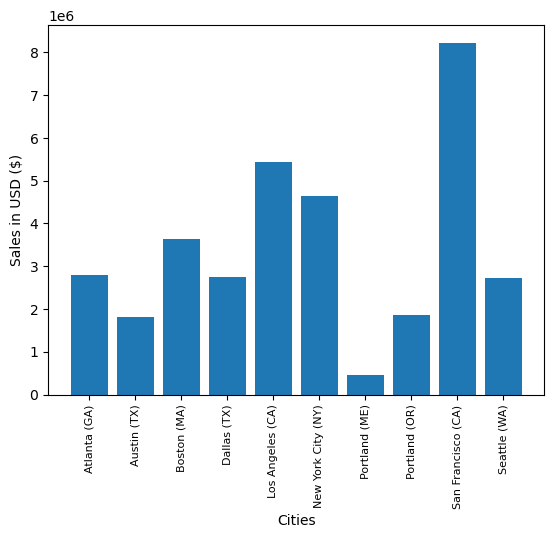

In [83]:
cities = [city for city, df in sales_all.groupby('city')]

plt.bar(cities, result2['sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)');

### Question 3: What time should we display ads to maximize likelihood of customer's buying product

Let's extract the hour and minute data from order date

In [86]:
sales_all['hour'] = sales_all['order date'].dt.hour
sales_all['minute'] = sales_all['order date'].dt.minute
sales_all.head()

,order id,product,quantity ordered,price each,order date,purchase address,order day,order month,order year,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,11,Los Angeles (CA),9,27


Now i wanna do little checking to make sure our hour and minute data is clean

In [97]:
sales_all['hour'].value_counts()
sales_all['minute'].value_counts()

5     3237
48    3199
27    3182
21    3179
16    3175
19    3175
9     3175
35    3175
52    3169
1     3155
46    3145
7     3136
17    3136
44    3133
36    3131
10    3127
13    3126
11    3123
29    3118
37    3117
30    3117
34    3113
57    3111
22    3111
24    3108
12    3107
53    3100
4     3098
50    3097
55    3094
54    3094
39    3093
32    3089
58    3087
59    3082
43    3081
51    3079
25    3077
23    3074
56    3073
33    3072
28    3071
15    3069
47    3068
0     3065
49    3064
38    3064
2     3057
8     3050
20    3048
45    3045
18    3044
41    3043
40    3042
14    3037
26    3032
42    3024
6     3022
31    3018
3     3017
Name: minute, dtype: int64

Now lets plot the result

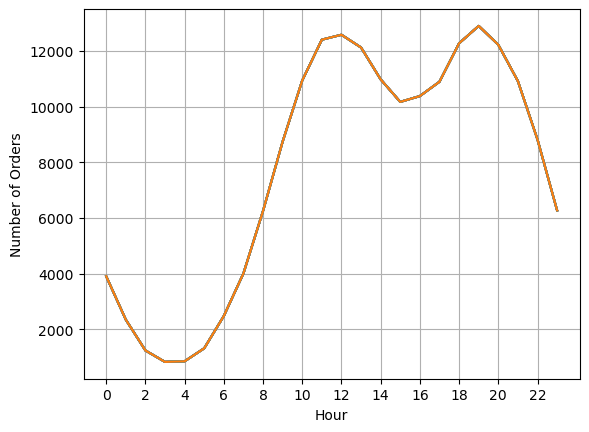

In [127]:
import importlib
importlib.reload(plt)

hours = [hour for hour, df in sales_all.groupby('hour')]

xticks = [x for x in range(0,24,2)]

plt.plot(hours, sales_all.groupby(['hour']).count())
plt.xticks(xticks)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders');

### Question 4: What products are most often sold together ?

After looking at our datasets, we can check the products that sold together through order id (which has the same order id)

In [129]:
#we make a new dataframe by duplicate order id
df1 = sales_all[sales_all['order id'].duplicated(keep=False)]

#Group the product in the same column
df1['pack'] = df1.groupby('order id')['product'].transform(lambda x: ','.join(x))

#then we drop the duplicate so we can count the group pack order
df1 = df1[['order id', 'pack']].drop_duplicates()

C:\Users\chris\AppData\Local\Temp\ipykernel_4520\1637361224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pack'] = df1.groupby('order id')['product'].transform(lambda x: ','.join(x))


,order id,pack
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [132]:
# we gonna use new libraries for this
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['pack']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? and why?

''

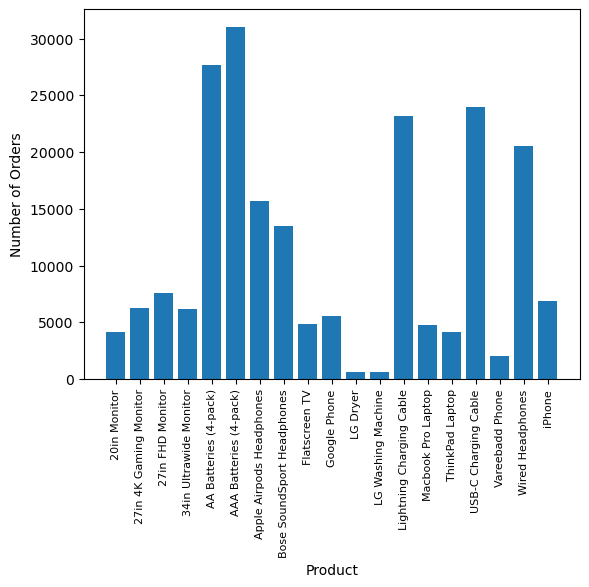

In [142]:
#lets group the data by product
sku = sales_all.groupby('product')
sku_quantity = sku.sum()['quantity ordered']

products = [product for product, df in sku]

plt.bar(products, sku_quantity)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Number of Orders')
plt.xlabel('Product')
;

C:\Users\chris\AppData\Local\Temp\ipykernel_4520\3726437255.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\chris\AppData\Local\Temp\ipykernel_4520\3726437255.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


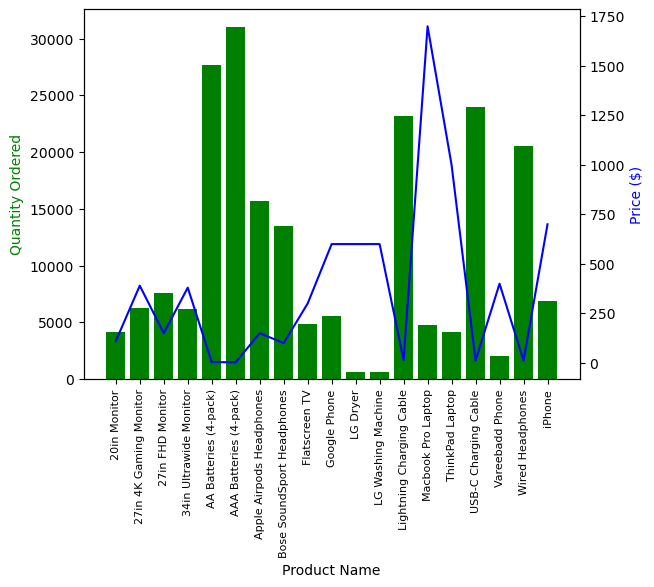

In [146]:
prices = sales_all.groupby('product').mean()['price each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, sku_quantity, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

## Conclusion

So here's the conclusion of our simple analysis:
#### 1 The month with highest sales is December
It's holiday time and it's the end of the year. People bless each other with gifts so maybe this is the reason why the sales of electronic products increased during the holiday season. Also with a new year comes people love rewarding themselves with something new

#### 2 The city with highest sales is San Fransisco
Well my first hypothesis is because the effect of sillicono valley, and also maybe it could be affected by the number of population. but we need extra data to prove this

#### 3 The time to display ads, is around 10 to 13 and 18 to 20
This is the break time or free time for most people who are working in 8 hour-shift that started at 8 am. Yes we also need more data to classify our customer

#### 4 The products that sold often together is Iphone & Lightning Charging Cable
Yea since Apple doesn't include the charger in the package of the new iPhone, customers tend to buy the charger also.

#### 5 The product that sold the most is AAA-Batteries
Based on the price of each product, AAA-batteries is considered the cheapest ones, and also it has a wide range functions or usage

Last, lets export our data and try to visualize it into Tableau